# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


In [91]:
cities

['guarapari',
 'remire-montjoly',
 'port-aux-francais',
 'palmer',
 'mercedes',
 'talnakh',
 'high river',
 'gazojak',
 "st. john's",
 'santana',
 'ribeira grande',
 'isla mujeres',
 'aral',
 'queenstown',
 'picos',
 'tapes',
 'adamstown',
 'kataragama',
 'bilibino',
 'colonia',
 'ilulissat',
 'giado',
 'vallegrande',
 'birobidzhan',
 'princeville',
 'haiku-pauwela',
 'puerto ayora',
 'qaqortoq',
 'severo-yeniseyskiy',
 'ta`u',
 'west island',
 'loango',
 'albany',
 'invercargill',
 'progreso',
 'ust-nera',
 'atherton',
 'petropavlovsk-kamchatsky',
 'hami',
 'east london',
 'alofi',
 'edinburgh of the seven seas',
 'san sebastian de la gomera',
 'dakhla',
 'taiohae',
 'rundu',
 "ramon'",
 'papatowai',
 'port elizabeth',
 'coruripe',
 'tralee',
 'puerto baquerizo moreno',
 'grytviken',
 'auki',
 'am djarass',
 'laguna',
 'langzhong',
 'alto araguaia',
 'anzio',
 'yellowknife',
 'waitangi',
 'kolwezi',
 'quellon',
 'longyearbyen',
 'stanley',
 'puerto natales',
 'blackmans bay',
 'olonki

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [95]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city_url = base_url +"q=" + city+ "&appid=" + weather_api_key + "&units=" + units
response = requests.get(city_url).json()
response

{'coord': {'lon': -123.0172, 'lat': 38.8055},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 14.1,
  'feels_like': 12.77,
  'temp_min': 10.21,
  'temp_max': 15.96,
  'pressure': 1016,
  'humidity': 46,
  'sea_level': 1016,
  'grnd_level': 1005},
 'visibility': 10000,
 'wind': {'speed': 1.52, 'deg': 300, 'gust': 1.47},
 'clouds': {'all': 100},
 'dt': 1696303081,
 'sys': {'type': 2,
  'id': 2004738,
  'country': 'US',
  'sunrise': 1696255718,
  'sunset': 1696298044},
 'timezone': -25200,
 'id': 5338104,
 'name': 'Cloverdale',
 'cod': 200}

In [4]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
#query_url = base_url +"q=" + city+ "&appid=" + weather_api_key + "&units=" + units

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url +"q=" + city+ "&appid=" + weather_api_key + "&units=" + units
    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guarapari
Processing Record 2 of Set 1 | remire-montjoly
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | palmer
Processing Record 5 of Set 1 | mercedes
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | high river
Processing Record 8 of Set 1 | gazojak
Processing Record 9 of Set 1 | st. john's
Processing Record 10 of Set 1 | santana
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | isla mujeres
Processing Record 13 of Set 1 | aral
Processing Record 14 of Set 1 | queenstown
Processing Record 15 of Set 1 | picos
Processing Record 16 of Set 1 | tapes
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | kataragama
City not found. Skipping...
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | colonia
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | giado
P

Processing Record 40 of Set 4 | byerazino
Processing Record 41 of Set 4 | tazacorte
Processing Record 42 of Set 4 | hadibu
Processing Record 43 of Set 4 | singaraja
Processing Record 44 of Set 4 | san jose village
City not found. Skipping...
Processing Record 45 of Set 4 | kununurra
Processing Record 46 of Set 4 | tofol
Processing Record 47 of Set 4 | punta arenas
Processing Record 48 of Set 4 | kuanda
Processing Record 49 of Set 4 | badger
Processing Record 0 of Set 5 | margaret river
Processing Record 1 of Set 5 | mahajanga
Processing Record 2 of Set 5 | atafu village
Processing Record 3 of Set 5 | ascencion
Processing Record 4 of Set 5 | mount isa
Processing Record 5 of Set 5 | gulfport
Processing Record 6 of Set 5 | eduardo castex
Processing Record 7 of Set 5 | fonte boa
Processing Record 8 of Set 5 | tamanrasset
Processing Record 9 of Set 5 | cinarli
Processing Record 10 of Set 5 | cadale
Processing Record 11 of Set 5 | bernkastel-kues
Processing Record 12 of Set 5 | jilib
Process

Processing Record 31 of Set 8 | laramie
Processing Record 32 of Set 8 | pasargad
City not found. Skipping...
Processing Record 33 of Set 8 | iernut
Processing Record 34 of Set 8 | tsiombe
Processing Record 35 of Set 8 | bardai
Processing Record 36 of Set 8 | ouellah
City not found. Skipping...
Processing Record 37 of Set 8 | kerikeri
Processing Record 38 of Set 8 | little cayman
City not found. Skipping...
Processing Record 39 of Set 8 | guerrero negro
Processing Record 40 of Set 8 | tari
Processing Record 41 of Set 8 | plettenberg bay
Processing Record 42 of Set 8 | martapura
Processing Record 43 of Set 8 | rupert
Processing Record 44 of Set 8 | fortaleza
Processing Record 45 of Set 8 | zhosaly
Processing Record 46 of Set 8 | makhambet
Processing Record 47 of Set 8 | makokou
Processing Record 48 of Set 8 | appley bridge
Processing Record 49 of Set 8 | castillos
Processing Record 0 of Set 9 | kilindoni
Processing Record 1 of Set 9 | beja
Processing Record 2 of Set 9 | vandavasi
Process

Processing Record 20 of Set 12 | cedeira
Processing Record 21 of Set 12 | itaituba
Processing Record 22 of Set 12 | diebougou
Processing Record 23 of Set 12 | santiago de cao
Processing Record 24 of Set 12 | willowmore
Processing Record 25 of Set 12 | amursk
Processing Record 26 of Set 12 | richmond
Processing Record 27 of Set 12 | margate
Processing Record 28 of Set 12 | nanyang
Processing Record 29 of Set 12 | lindisfarne
Processing Record 30 of Set 12 | nova vicosa
Processing Record 31 of Set 12 | holdenville
Processing Record 32 of Set 12 | tura
Processing Record 33 of Set 12 | sinjai
Processing Record 34 of Set 12 | yangor
City not found. Skipping...
Processing Record 35 of Set 12 | bandarbeyla
Processing Record 36 of Set 12 | lagoa
Processing Record 37 of Set 12 | alma
Processing Record 38 of Set 12 | nizhniy odes
Processing Record 39 of Set 12 | sur
Processing Record 40 of Set 12 | boyolangu
Processing Record 41 of Set 12 | grand-bassam
Processing Record 42 of Set 12 | seven pag

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,guarapari,-20.6667,-40.4975,23.83,72,81,8.37,BR,1696180716
1,remire-montjoly,4.9167,-52.2667,33.02,58,75,4.63,GF,1696180815
2,port-aux-francais,-49.3500,70.2167,6.26,97,100,19.13,TF,1696180815
3,palmer,42.1584,-72.3287,24.32,59,0,4.63,US,1696180815
4,mercedes,-34.6515,-59.4307,22.19,29,0,0.83,AR,1696180815


In [7]:
pwd

'D:\\Aruna Workspace\\Python-api-Challenge\\starter_code'

In [66]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [67]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guarapari,-20.6667,-40.4975,23.83,72,81,8.37,BR,1696180716
1,remire-montjoly,4.9167,-52.2667,33.02,58,75,4.63,GF,1696180815
2,port-aux-francais,-49.3500,70.2167,6.26,97,100,19.13,TF,1696180815
3,palmer,42.1584,-72.3287,24.32,59,0,4.63,US,1696180815
4,mercedes,-34.6515,-59.4307,22.19,29,0,0.83,AR,1696180815


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

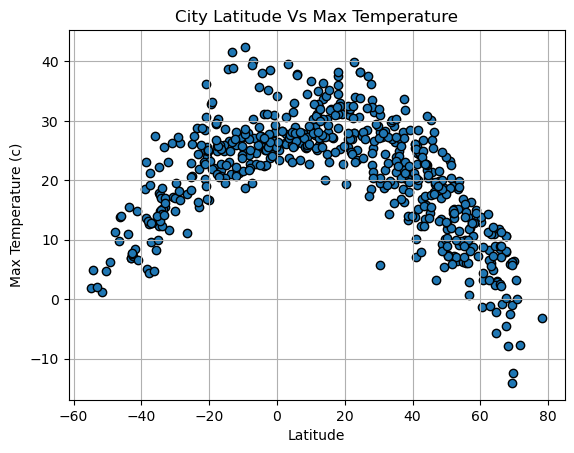

In [69]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolor="black",marker='o')

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude Vs Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (c)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

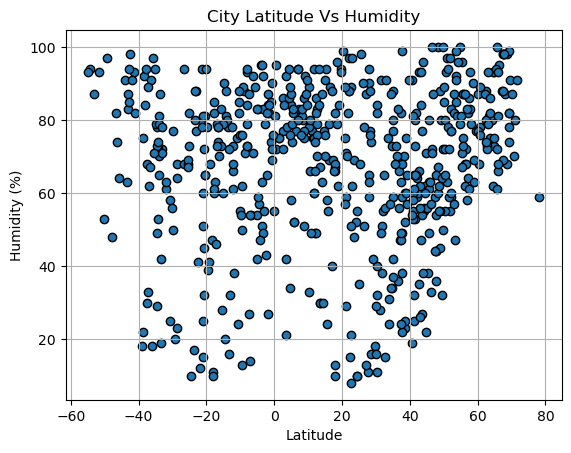

In [70]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolor="black",marker='o')

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude Vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

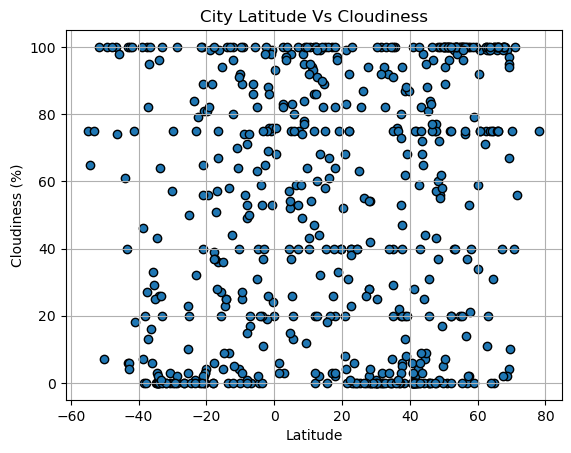

In [71]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolor="black",marker='o')

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude Vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

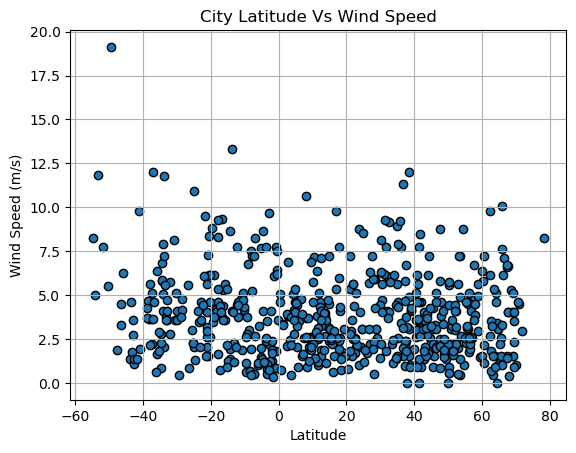

In [72]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolor="black",marker='o')

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude Vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [73]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = (city_data_df[city_data_df['Lat'] > 0]).reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,remire-montjoly,4.9167,-52.2667,33.02,58,75,4.63,GF,1696180815
1,palmer,42.1584,-72.3287,24.32,59,0,4.63,US,1696180815
2,talnakh,69.4865,88.3972,-12.38,91,10,2.35,RU,1696180816
3,high river,50.5834,-113.8687,7.31,93,100,2.22,CA,1696180561
4,gazojak,41.1875,61.4036,19.25,32,28,3.50,TM,1696180816


In [74]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = (city_data_df[city_data_df['Lat'] < 0]).reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,guarapari,-20.6667,-40.4975,23.83,72,81,8.37,BR,1696180716
1,port-aux-francais,-49.3500,70.2167,6.26,97,100,19.13,TF,1696180815
2,mercedes,-34.6515,-59.4307,22.19,29,0,0.83,AR,1696180815
3,santana,-0.0583,-51.1817,34.10,55,20,3.60,BR,1696180816
4,queenstown,-31.8976,26.8753,11.72,61,0,5.74,ZA,1696180817


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8118898909597585


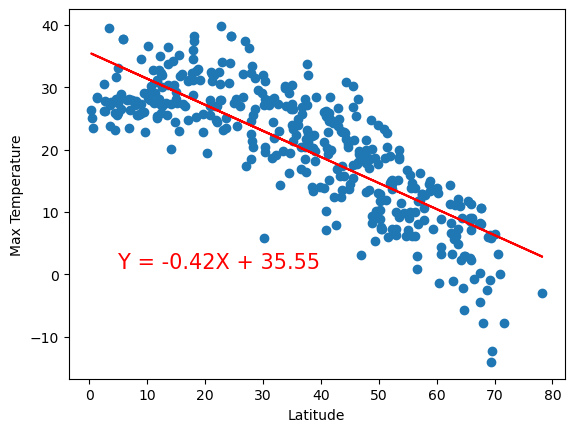

In [83]:
# Linear regression on Northern Hemisphere
X = northern_hemi_df['Lat'].values
y = northern_hemi_df['Max Temp'].values

plt.scatter(X,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

slope, intercept, r_value, p_value, std_err = linregress(X, y)
plt.plot(X, intercept + slope*X, color='red', label='Regression Line')
print(f"The r-value is: {r_value}")

equation_text = f'Y = {slope:.2f}X + {intercept:.2f}'
plt.text(0.1, 0.3, equation_text, transform=plt.gca().transAxes, fontsize=15,color="red")
plt.show()

The r-value is: 0.7708611340252154


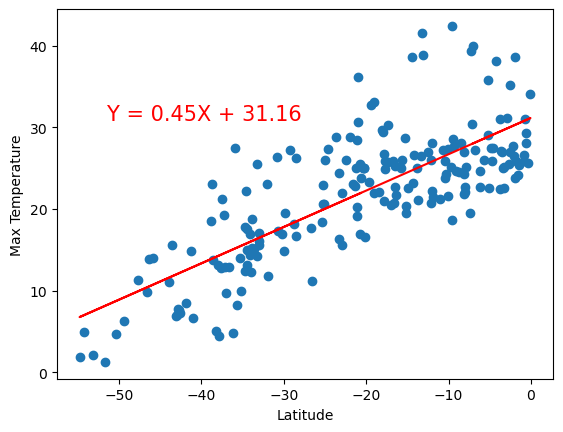

In [84]:
# Linear regression on Southern Hemisphere
X = southern_hemi_df['Lat'].values
y = southern_hemi_df['Max Temp'].values

plt.scatter(X,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

slope, intercept, r_value, p_value, std_err = linregress(X, y)
plt.plot(X, intercept + slope*X, color='red', label='Regression Line')
print(f"The r-value is: {r_value}")

equation_text = f'Y = {slope:.2f}X + {intercept:.2f}'
plt.text(0.1, 0.7, equation_text, transform=plt.gca().transAxes, fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Northern hemisphere has no correlation whereas Southern hemisphere has some correlation for latitude Vs Temperature

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12976576711966514


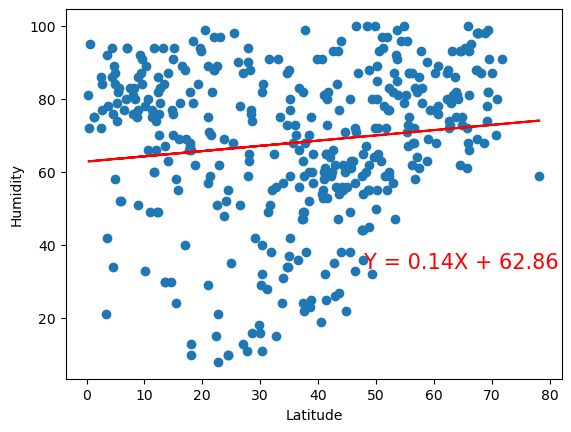

In [85]:
# Northern Hemisphere
X = northern_hemi_df['Lat'].values
y = northern_hemi_df['Humidity'].values

plt.scatter(X,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

slope, intercept, r_value, p_value, std_err = linregress(X, y)
plt.plot(X, intercept + slope*X, color='red', label='Regression Line')
print(f"The r-value is: {r_value}")

equation_text = f'Y = {slope:.2f}X + {intercept:.2f}'
plt.text(0.6, 0.3, equation_text, transform=plt.gca().transAxes, fontsize=15,color="red")
plt.show()

The r-value is: -0.05791230075611842


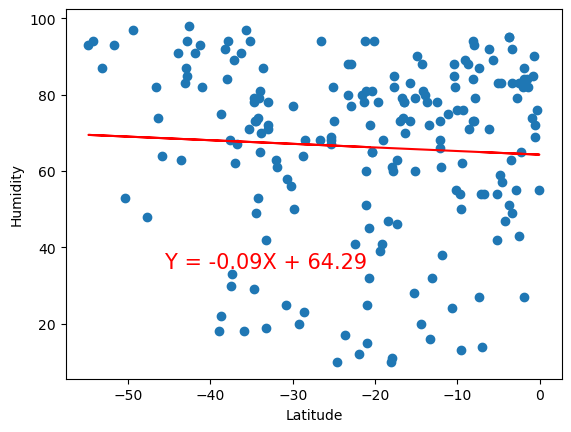

In [86]:
# Southern Hemisphere
X = southern_hemi_df['Lat'].values
y = southern_hemi_df['Humidity'].values

plt.scatter(X,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

slope, intercept, r_value, p_value, std_err = linregress(X, y)
plt.plot(X, intercept + slope*X, color='red', label='Regression Line')
print(f"The r-value is: {r_value}")

equation_text = f'Y = {slope:.2f}X + {intercept:.2f}'
plt.text(0.2, 0.3, equation_text, transform=plt.gca().transAxes, fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Northern hemisphere and Southern hemisphere has no correlation for latitude Vs Humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0956015384901408


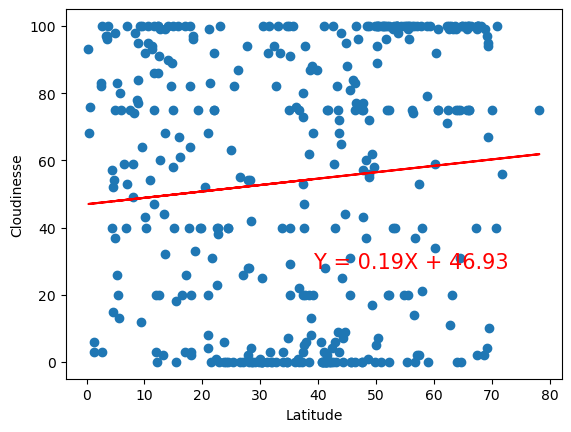

In [87]:
# Northern Hemisphere
X = northern_hemi_df['Lat'].values
y = northern_hemi_df['Cloudiness'].values

plt.scatter(X,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudinesse')

slope, intercept, r_value, p_value, std_err = linregress(X, y)
plt.plot(X, intercept + slope*X, color='red', label='Regression Line')
print(f"The r-value is: {r_value}")

equation_text = f'Y = {slope:.2f}X + {intercept:.2f}'
plt.text(0.5, 0.3, equation_text, transform=plt.gca().transAxes, fontsize=15,color="red")
plt.show()

The r-value is: 0.0635930475867396


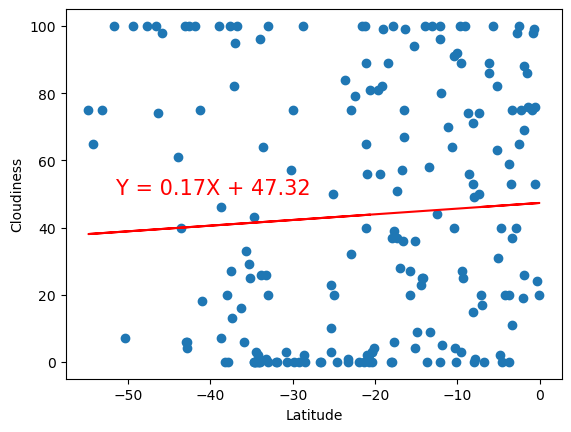

In [88]:
# Southern Hemisphere
X = southern_hemi_df['Lat'].values
y = southern_hemi_df['Cloudiness'].values

plt.scatter(X,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

slope, intercept, r_value, p_value, std_err = linregress(X, y)
plt.plot(X, intercept + slope*X, color='red', label='Regression Line')
print(f"The r-value is: {r_value}")

equation_text = f'Y = {slope:.2f}X + {intercept:.2f}'
plt.text(0.1, 0.5, equation_text, transform=plt.gca().transAxes, fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Northern hemisphere and Southern hemisphere has no correlation for latitude Vs Cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0005817947448114699


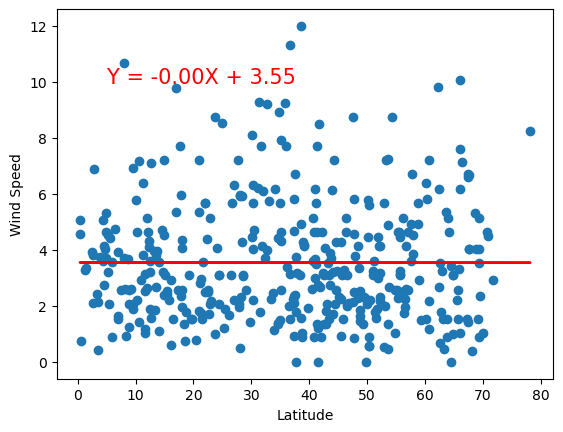

In [89]:
# Northern Hemisphere
X = northern_hemi_df['Lat'].values
y = northern_hemi_df['Wind Speed'].values

plt.scatter(X,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

slope, intercept, r_value, p_value, std_err = linregress(X, y)
plt.plot(X, intercept + slope*X, color='red', label='Regression Line')
print(f"The r-value is: {r_value}")

equation_text = f'Y = {slope:.2f}X + {intercept:.2f}'
plt.text(0.1, 0.8, equation_text, transform=plt.gca().transAxes, fontsize=15,color="red")
plt.show()

The r-value is: -0.18664244287468953


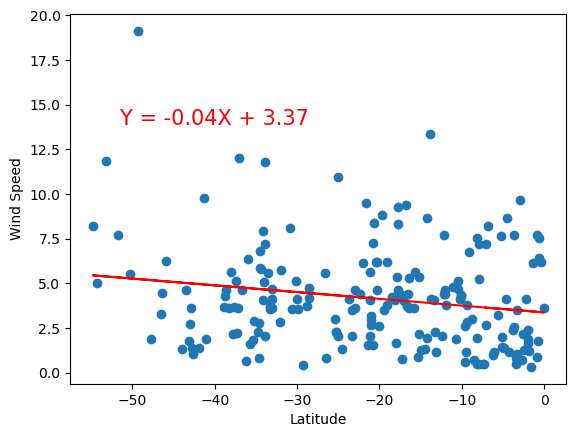

In [90]:
# Southern Hemisphere
X = southern_hemi_df['Lat'].values
y = southern_hemi_df['Wind Speed'].values

plt.scatter(X,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

slope, intercept, r_value, p_value, std_err = linregress(X, y)
plt.plot(X, intercept + slope*X, color='red', label='Regression Line')
print(f"The r-value is: {r_value}")

equation_text = f'Y = {slope:.2f}X + {intercept:.2f}'
plt.text(0.1, 0.7, equation_text, transform=plt.gca().transAxes, fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Northern hemisphere and Southern hemisphere has no correlation for latitude Vs Wind Speed